## Importing Necessary Libraries

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
import keras

In [ ]:
from keras.models import Sequential
from keras.datasets import mnist

In [ ]:
from keras.layers import Dense
from keras.optimizers import Adam

In [ ]:
import random

In [ ]:
from keras.utils import to_categorical

## Defining Training and Testing Datasets

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
y_train.shape

(60000,)

## Number of Images per Digit

In [ ]:
classes = 10
samples = []
for i in range(classes):
  x = X_train[y_train == i]
  samples.append(len(x))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

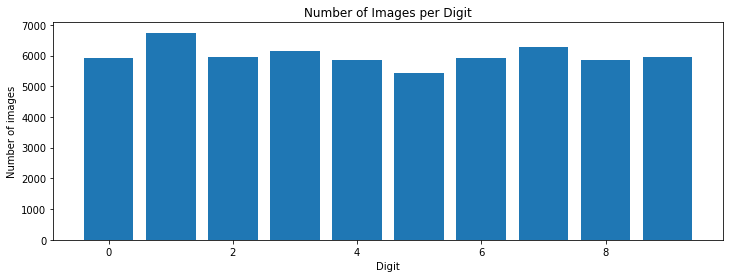

In [ ]:
print(samples)
plt.figure(figsize=(12, 4))
y = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
plt.bar(y, samples)
plt.title("Number of Images per Digit")
plt.xlabel("Digit")
plt.ylabel("Number of images")

## Multiclass Results

In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## Matrix Multiplication

In [ ]:
X_train = X_train / 255 
X_test = X_test / 255

In [ ]:
pixels = 784
X_train = X_train.reshape(X_train.shape[0], pixels)
X_test = X_test.reshape(X_test.shape[0], pixels)

In [ ]:
X_train.shape

(60000, 784)

## Creating Neural Networks Model

In [ ]:
model = Sequential()
model.add(Dense(10, input_dim = pixels, activation = 'relu'))
model.add(Dense(30, activation ='relu'))
model.add(Dense(10, activation ='relu'))
model.add(Dense(classes, activation ='softmax'))
model.compile(Adam(lr = 0.01), loss ='categorical_crossentropy', 
              metrics = ['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 30)                330       
                                                                 
 dense_2 (Dense)             (None, 10)                310       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
Total params: 8,600
Trainable params: 8,600
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 20,
                    batch_size = 150, verbose = 1, shuffle = 1)

Epoch 1/20
280/280 [==============================] - 2s 4ms/step - loss: 0.5159 - accuracy: 0.8344 - val_loss: 0.2952 - val_accuracy: 0.9113
Epoch 2/20
280/280 [==============================] - 1s 4ms/step - loss: 0.2657 - accuracy: 0.9201 - val_loss: 0.2712 - val_accuracy: 0.9206
Epoch 3/20
280/280 [==============================] - 1s 4ms/step - loss: 0.2434 - accuracy: 0.9288 - val_loss: 0.2540 - val_accuracy: 0.9286
Epoch 4/20
280/280 [==============================] - 1s 3ms/step - loss: 0.2238 - accuracy: 0.9324 - val_loss: 0.2662 - val_accuracy: 0.9237
Epoch 5/20
280/280 [==============================] - 1s 4ms/step - loss: 0.2149 - accuracy: 0.9353 - val_loss: 0.2530 - val_accuracy: 0.9267
Epoch 6/20
280/280 [==============================] - 1s 4ms/step - loss: 0.2101 - accuracy: 0.9380 - val_loss: 0.2391 - val_accuracy: 0.9329
Epoch 7/20
280/280 [==============================] - 1s 3ms/step - loss: 0.1985 - accuracy: 0.9405 - val_loss: 0.2279 - val_accuracy: 0.9366
Epoch 

## Plotting Loss and Validation Loss

Text(0.5, 0, 'Epochs')

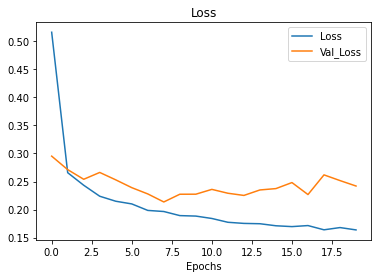

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Loss', 'Val_Loss'])
plt.title('Loss')
plt.xlabel('Epochs')

## Plotting Accuracy and Validation Accuracy

Text(0.5, 0, 'Epochs')

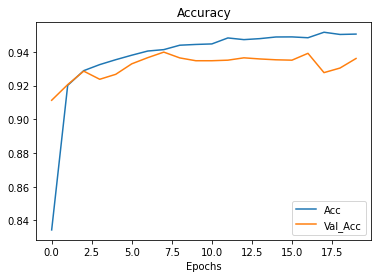

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Acc', 'Val_Acc'])
plt.title('Accuracy')
plt.xlabel('Epochs')